In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]

In [7]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

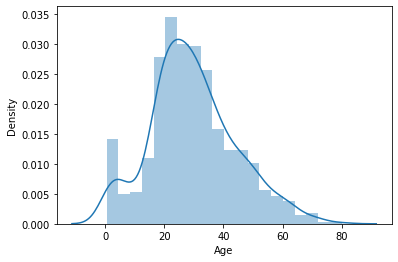

In [8]:
sns.distplot(df['Age'])

In [12]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [13]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [14]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [15]:
for i in df.columns:
    print('{} have these no opf unique value : {}'.format(i,len(df[i].unique())))

Pclass have these no opf unique value : 3
Sex have these no opf unique value : 2
Age have these no opf unique value : 88
SibSp have these no opf unique value : 7
Parch have these no opf unique value : 7
Fare have these no opf unique value : 248
Survived have these no opf unique value : 2


In [16]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [17]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [18]:
l = {"female":0,"male":1}
df['Sex']=df['Sex'].map(l)

In [19]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [20]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [21]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
d = scale.fit_transform(X)

In [22]:
X = pd.DataFrame(d,columns=list(X.columns))

In [23]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445
1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845
2,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854
3,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730
4,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
des = DecisionTreeClassifier()
des.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
pred = des.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [31]:
accuracy_score(y_test,pred)

0.7574626865671642

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       157
           1       0.72      0.68      0.70       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



In [33]:
confusion_matrix(y_test,pred)

array([[128,  29],
       [ 36,  75]], dtype=int64)

In [42]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

In [35]:
param = {}

[Text(0.3708896324282787, 0.98, 'X[1] <= -0.309\ngini = 0.467\nsamples = 623\nvalue = [392, 231]'),
 Text(0.17315573770491804, 0.94, 'X[0] <= 0.229\ngini = 0.396\nsamples = 213\nvalue = [58, 155]'),
 Text(0.0389344262295082, 0.9, 'X[2] <= -2.064\ngini = 0.07\nsamples = 110\nvalue = [4, 106]'),
 Text(0.01639344262295082, 0.86, 'X[5] <= 1.139\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.00819672131147541, 0.82, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02459016393442623, 0.82, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06147540983606557, 0.86, 'X[5] <= 2.352\ngini = 0.054\nsamples = 108\nvalue = [3, 105]'),
 Text(0.040983606557377046, 0.82, 'X[2] <= 1.548\ngini = 0.041\nsamples = 96\nvalue = [2, 94]'),
 Text(0.02459016393442623, 0.78, 'X[5] <= -0.205\ngini = 0.024\nsamples = 84\nvalue = [1, 83]'),
 Text(0.01639344262295082, 0.74, 'X[5] <= -0.241\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.00819672131147541, 0.7, 'gini = 0.0\nsamples = 21\nvalue = [0,

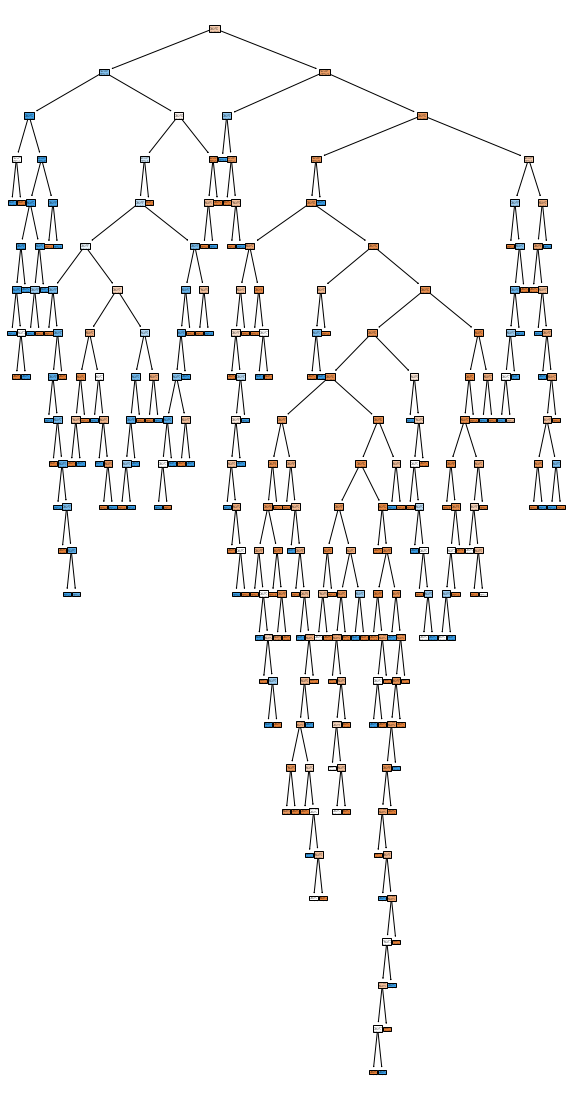

In [43]:
plt.figure(figsize=(10,20))
tree.plot_tree(des,filled=True)

In [58]:
params = {'criterion':['gini','entropy'],'max_depth':[5,10,2,4,40,30],'min_samples_split':[2,5,4,6]}
des_regressor = GridSearchCV(des,params,cv = 5)

In [59]:
des_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 2, 4, 40, 30],
                         'min_samples_split': [2, 5, 4, 6]})

In [60]:
print(des_regressor.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 5}


In [61]:
pred = des_regressor.predict(X_test)

In [62]:
accuracy_score(y_test,pred)

0.8171641791044776

In [63]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.83      0.70      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



In [64]:
confusion_matrix(y_test,pred)

array([[141,  16],
       [ 33,  78]], dtype=int64)

In [65]:
import pickle

In [67]:
pickle.dump(scale,open('process.pkl','wb'))
pickle.dump(des_regressor,open('model.pkl','wb'))

In [82]:
data = {
    'Pclass':1,
    'Sex':0,
    'Age':38.0,
    'SibSp':1,
    'Parch':0,
    'Fare':71.2833
}

In [69]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [71]:
processing = pickle.load(open('process.pkl','rb'))
model1 = pickle.load(open('model.pkl','rb'))

In [83]:
l = np.array(list(data.values()))

In [84]:
s = l.reshape(1,-1)

In [85]:
p = processing.transform(s)

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [86]:
model1.predict(p)[0]

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1